# Car Price Prediction

A telecommunications service provider company specializing in non-national citizens residing in Spain. Their value proposition is to offer economical packages focused on international calls, data roaming, and flexible data rates.

In their strategic plan, they contemplate the diversification of services and propose the design of new areas of the company dedicated to marketing goods of interest to the non-national citizen community through the internet. Through surveys of their customers, it has been detected that the purchase of vehicles for non-national citizens could be a potential niche, specifically the second-hand car market.

They wish to offer a service within their mobile app that allows their customers to search for vehicles for sale and offer them a competitive price. To determine this price, the R&D department has obtained a dataset (dataset.csv) with second-hand vehicle sales and tasks the Data Science department with estimating the price of each vehicle to develop a competitive rate.

Therefore, the task to be carried out will be the following: Use the CRISP-DM methodology to estimate the price of a vehicle (Price field).

## 1. Introduction

### 1.1. Environment setup

In [2]:
import os
import pandas as pd                
import numpy as np                 

import seaborn as sns              
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### 1.2 Methodology

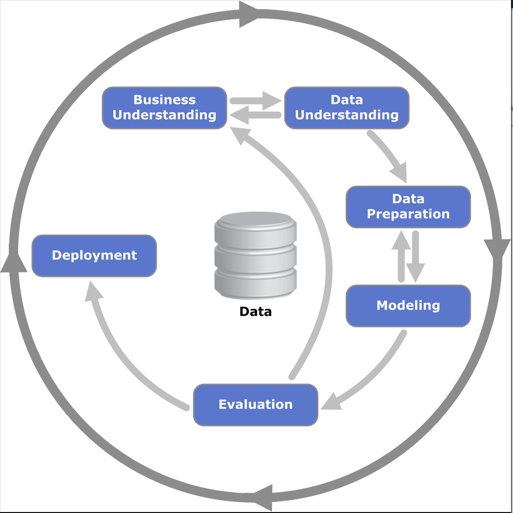



## 2. Business Understanding

Our goal will be to estimate the price of each vehicle in order to create a competitive pricing strategy.

## 3. Data Understanding

In [3]:
file_path = r"C:\Users\cuatr\OneDrive\Desktop\MASTER DATA SCIENCE\3-Casos_prácticos_ipynb\0. Evaluaciones_practicas_finales\7_Evaluacion_Final_Coches_Segunda_Mano_Análisis_Storytelling\Coches_Segunda_Mano.csv"
raw_df = pd.read_csv(file_path, encoding='utf-8')
df = raw_df.copy()

### 3.1. General Data Description

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
file_size = os.path.getsize(file_path)
print(f"Tamaño del fichero: {file_size} bytes")

Tamaño del fichero: 1606997 bytes


In [6]:
num_filas = len(df)
print(f"Número total de filas en el DataFrame: {num_filas}")

Número total de filas en el DataFrame: 11914


In [7]:
print("Primeras 10 líneas:")
print(df.head(10))
print("...")

Primeras 10 líneas:
  Marca      Modelo   Año                  Combustible     CV  Cilindros  \
0   BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1   BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2   BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
3   BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
4   BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
5   BMW    1 Series  2012  premium unleaded (required)  230.0        6.0   
6   BMW    1 Series  2012  premium unleaded (required)  300.0        6.0   
7   BMW    1 Series  2012  premium unleaded (required)  300.0        6.0   
8   BMW    1 Series  2012  premium unleaded (required)  230.0        6.0   
9   BMW    1 Series  2013  premium unleaded (required)  230.0        6.0   

  Transmisión          Tracción  Puertas  \
0      MANUAL  rear wheel drive      2.0   
1      MANUAL  rear wheel drive      2.0   
2      MANU

In [8]:
print("Últimas 10 líneas:")
print(df.tail(10))

Últimas 10 líneas:
         Marca  Modelo   Año                     Combustible     CV  \
11904      BMW      Z8  2002     premium unleaded (required)  394.0   
11905      BMW      Z8  2003     premium unleaded (required)  394.0   
11906    Acura     ZDX  2011     premium unleaded (required)  300.0   
11907    Acura     ZDX  2011     premium unleaded (required)  300.0   
11908    Acura     ZDX  2011     premium unleaded (required)  300.0   
11909    Acura     ZDX  2012     premium unleaded (required)  300.0   
11910    Acura     ZDX  2012     premium unleaded (required)  300.0   
11911    Acura     ZDX  2012     premium unleaded (required)  300.0   
11912    Acura     ZDX  2013  premium unleaded (recommended)  300.0   
11913  Lincoln  Zephyr  2006                regular unleaded  221.0   

       Cilindros Transmisión           Tracción  Puertas  \
11904        8.0      MANUAL   rear wheel drive      2.0   
11905        8.0      MANUAL   rear wheel drive      2.0   
11906        6.0   

In [9]:
df.columns

Index(['Marca', 'Modelo', 'Año', 'Combustible', 'CV', 'Cilindros',
       'Transmisión', 'Tracción', 'Puertas', 'Mercado', 'Tamaño', 'Estilo',
       'Consumo Carretera', 'Consumo Ciudad', 'Popularidad', 'Precio'],
      dtype='object')

In [10]:
print (df.dtypes)

Marca                 object
Modelo                object
Año                    int64
Combustible           object
CV                   float64
Cilindros            float64
Transmisión           object
Tracción              object
Puertas              float64
Mercado               object
Tamaño                object
Estilo                object
Consumo Carretera    float64
Consumo Ciudad       float64
Popularidad            int64
Precio               float64
dtype: object


### 3.2. Univariate Analysis

To begin the univariate analysis, we are going to create two separate dataframes with the qualitative and quantitative variables, where we prepare the basic statistics for each. This will make it easier for us to study them separately.

In [11]:
def analyze_df(df):
  data_types = dict(df.dtypes)
  numeric_cols = []
  categoric_cols = []
  for c,t in data_types.items():
    if t == np.float64:
      numeric_cols.append([c, 'Cuantitativa continua', df[c].mean(), df[c].min(), df[c].max(), df[c].median()])
    elif t == np.int64 or pd.Int64Dtype.is_dtype(t):
      numeric_cols.append([c, 'Cuantitativa discreta', df[c].mean(), df[c].min(), df[c].max(), df[c].median()])
    else:
      categoric_cols.append([c, f'Cualitativa', df[c].nunique()])
  n = pd.DataFrame(numeric_cols, columns=['Nombre', 'Tipo de variable', 'Media', 'Mínimo', 'Máximo', 'Mediana'])
  c = pd.DataFrame(categoric_cols, columns=['Nombre', 'Tipo de variable', 'Número de clases'])
  return n, c

numeric_types, categoric_types = analyze_df(df)
print("Finalizado OK")

analyze_df(df)

Finalizado OK


(              Nombre       Tipo de variable         Media  Mínimo     Máximo  \
 0                Año  Cuantitativa discreta   2010.384338  1990.0     2017.0   
 1                 CV  Cuantitativa continua    249.386070    55.0     1001.0   
 2          Cilindros  Cuantitativa continua      5.628829     0.0       16.0   
 3            Puertas  Cuantitativa continua      3.436093     2.0        4.0   
 4  Consumo Carretera  Cuantitativa continua     26.637485    12.0      354.0   
 5     Consumo Ciudad  Cuantitativa continua     19.733255     7.0      137.0   
 6        Popularidad  Cuantitativa discreta   1554.911197     2.0     5657.0   
 7             Precio  Cuantitativa continua  40594.737032  2000.0  2065902.0   
 
    Mediana  
 0   2015.0  
 1    227.0  
 2      6.0  
 3      4.0  
 4     26.0  
 5     18.0  
 6   1385.0  
 7  29995.0  ,
         Nombre Tipo de variable  Número de clases
 0        Marca      Cualitativa                48
 1       Modelo      Cualitativa        

#### 3.2.1. Qualitative Variables

In [12]:
print(categoric_types.to_string(index=False))

     Nombre Tipo de variable  Número de clases
      Marca      Cualitativa                48
     Modelo      Cualitativa               915
Combustible      Cualitativa                10
Transmisión      Cualitativa                 5
   Tracción      Cualitativa                 4
    Mercado      Cualitativa                71
     Tamaño      Cualitativa                 3
     Estilo      Cualitativa                16


C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


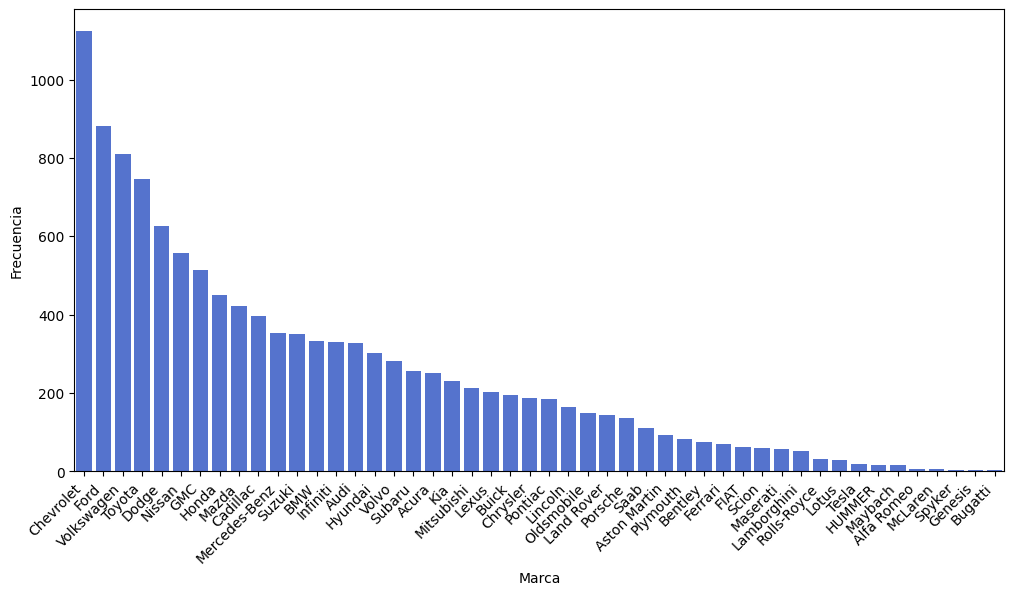

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


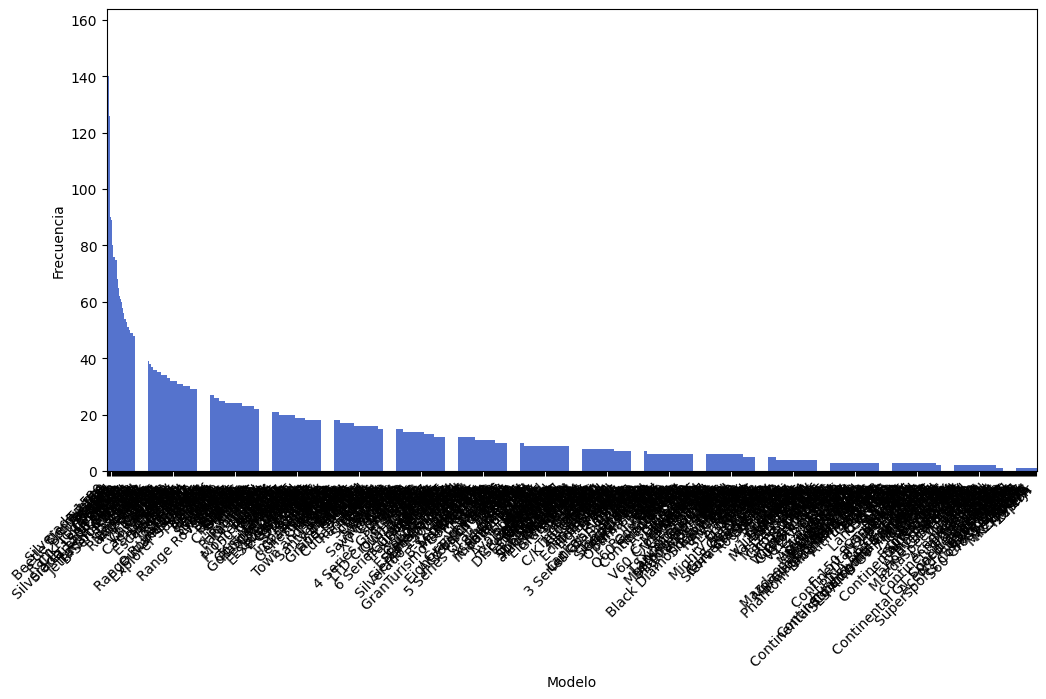

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


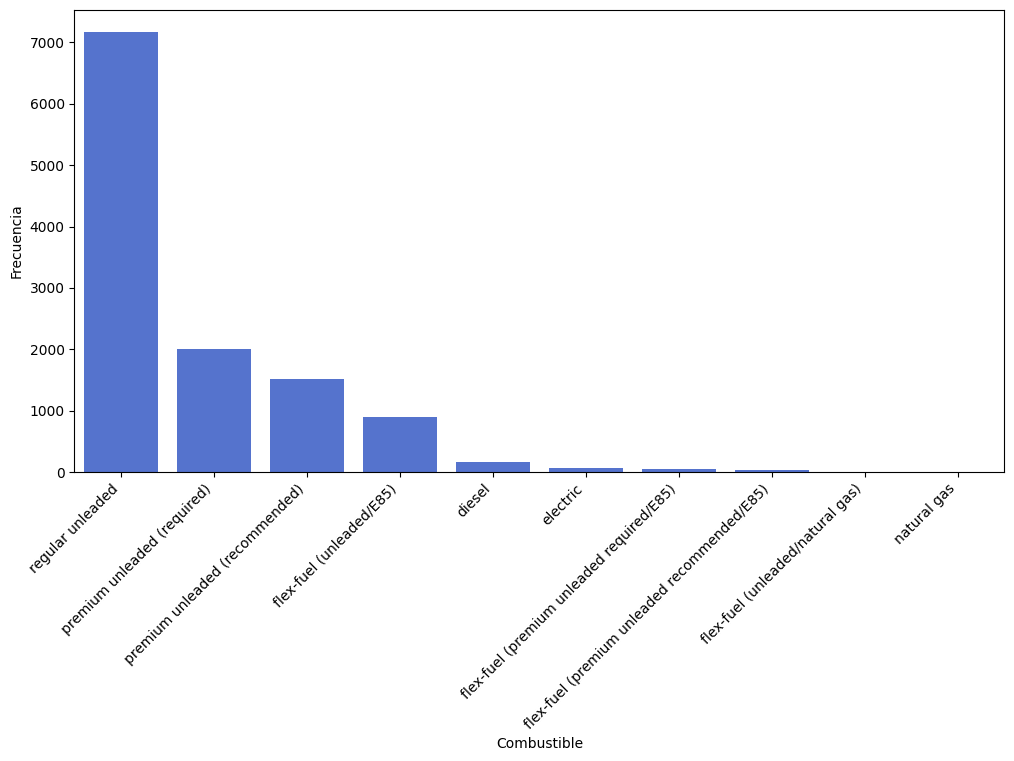

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


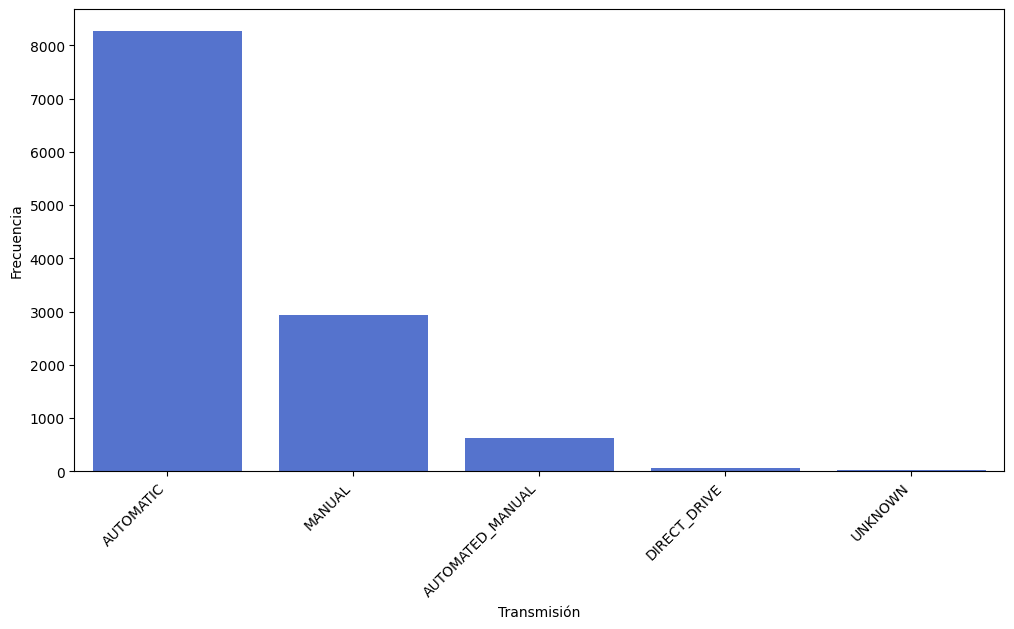

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


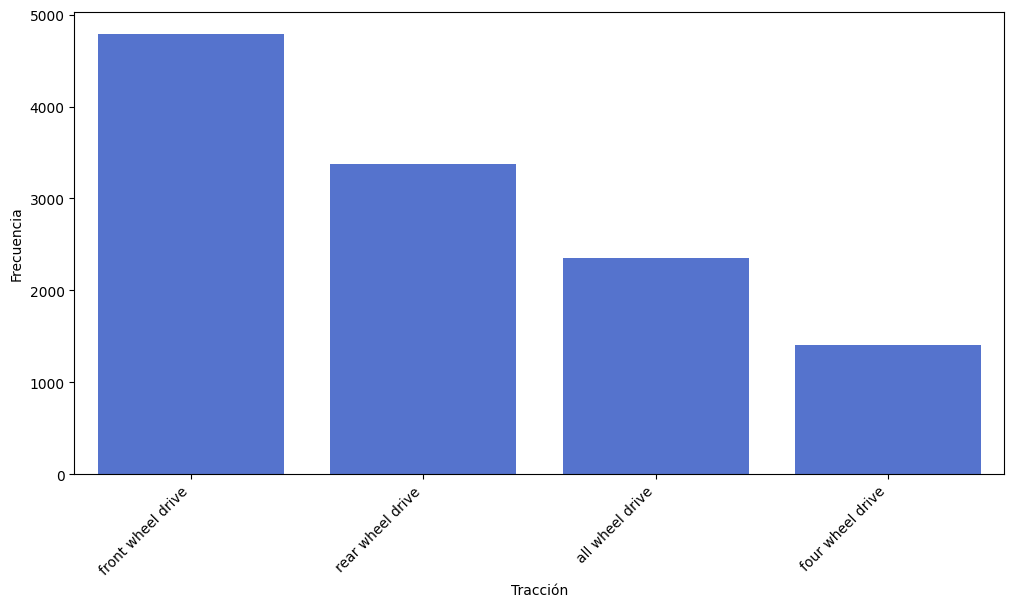

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


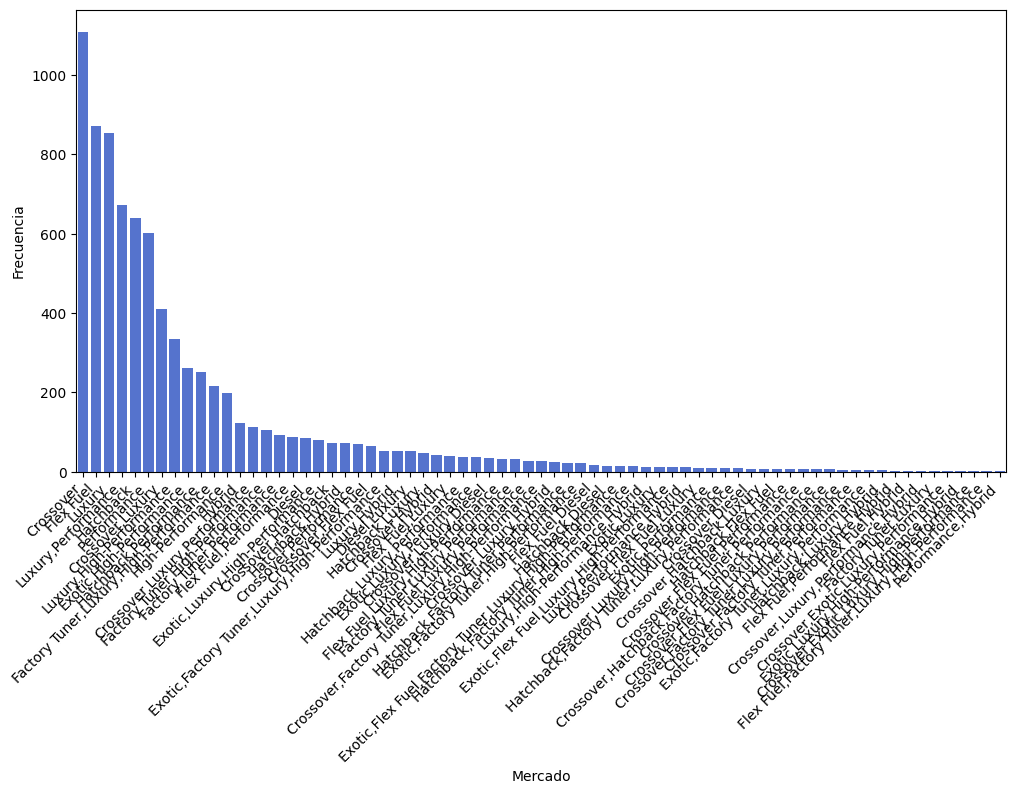

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


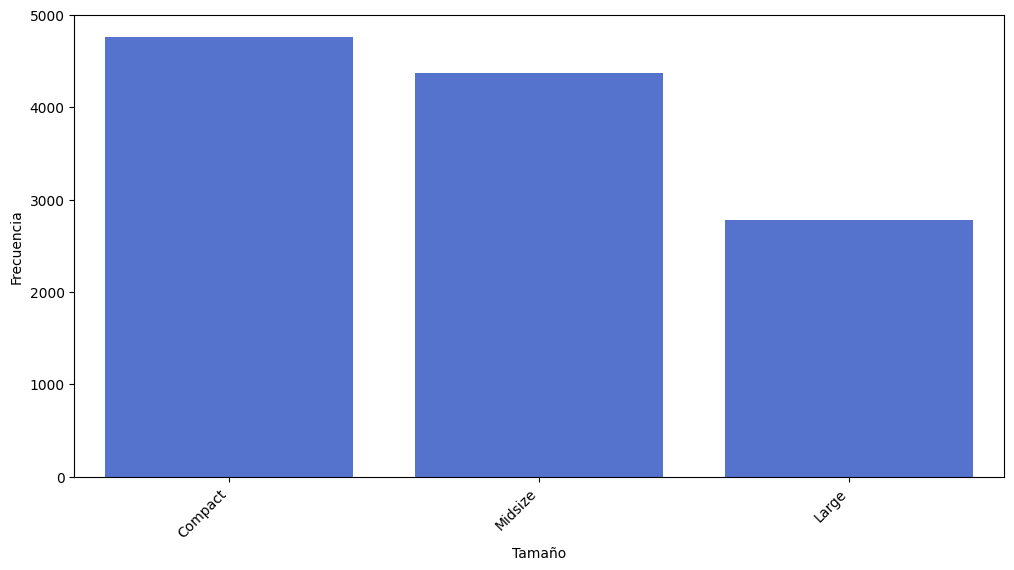

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\2841215462.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


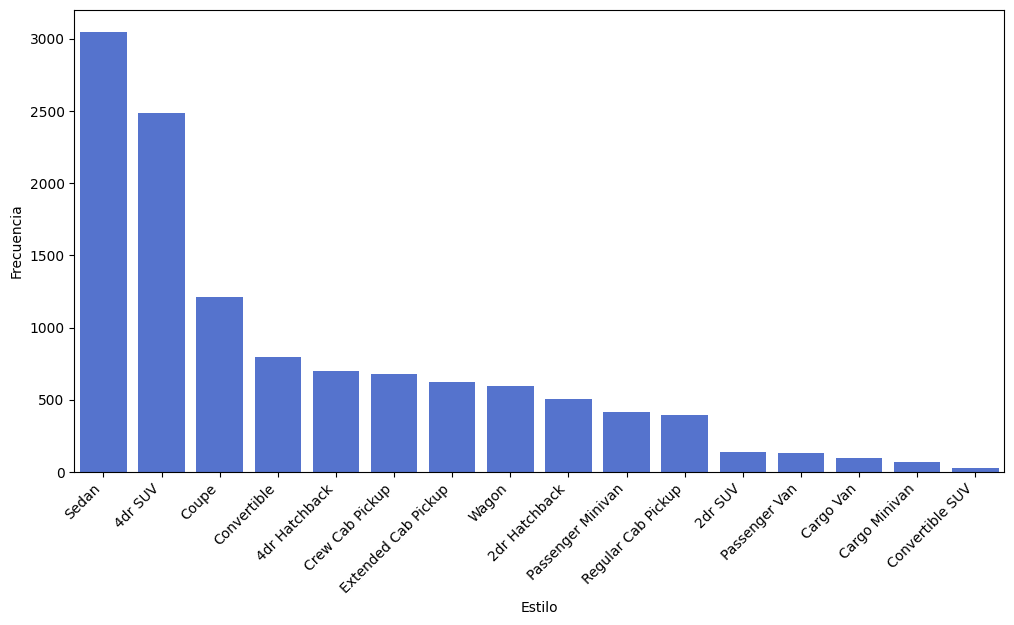

In [13]:
for i in categoric_types.index:
    if categoric_types['Nombre'][i] != 'IdCliente':
        column = categoric_types['Nombre'][i]
        fig, ax = plt.subplots(figsize=(12, 6))
        # Crear el gráfico de conteo con color royalblue
        chart = sns.countplot(data=df, x=column, color='royalblue', order=df[column].value_counts().index)
        # Ajustar las etiquetas del eje x
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
        # Ajustar la etiqueta del eje y
        chart.set_ylabel('Frecuencia')
        plt.show()

#### 3.2.1. Quantitative Variables

Let's proceed analogously with the quantitative variables and examine their basic statistics:

In [14]:
print(numeric_types.to_string(index=False))

           Nombre      Tipo de variable        Media  Mínimo    Máximo  Mediana
              Año Cuantitativa discreta  2010.384338  1990.0    2017.0   2015.0
               CV Cuantitativa continua   249.386070    55.0    1001.0    227.0
        Cilindros Cuantitativa continua     5.628829     0.0      16.0      6.0
          Puertas Cuantitativa continua     3.436093     2.0       4.0      4.0
Consumo Carretera Cuantitativa continua    26.637485    12.0     354.0     26.0
   Consumo Ciudad Cuantitativa continua    19.733255     7.0     137.0     18.0
      Popularidad Cuantitativa discreta  1554.911197     2.0    5657.0   1385.0
           Precio Cuantitativa continua 40594.737032  2000.0 2065902.0  29995.0


To understand their distribution, we visualize each one with a histogram

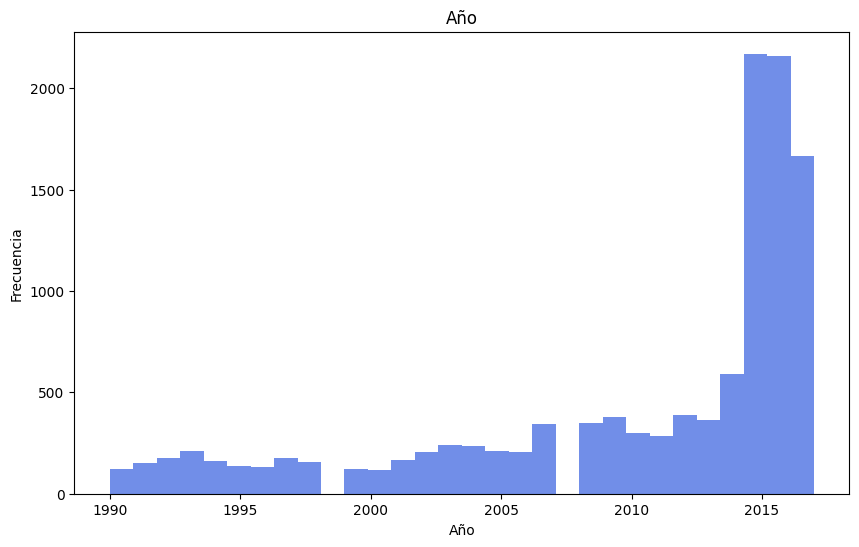

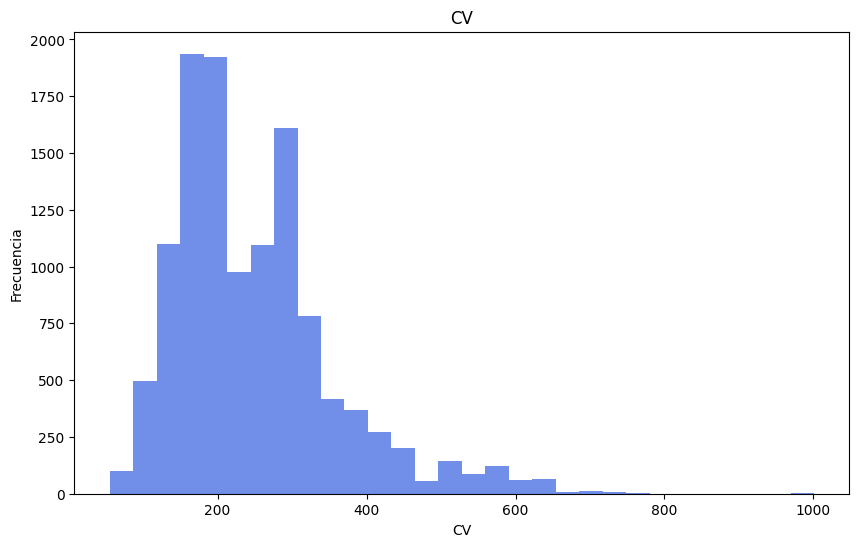

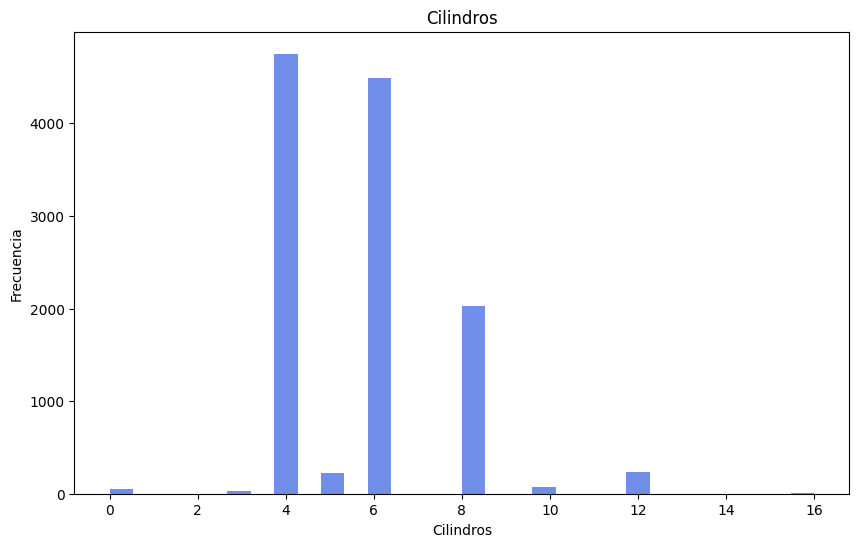

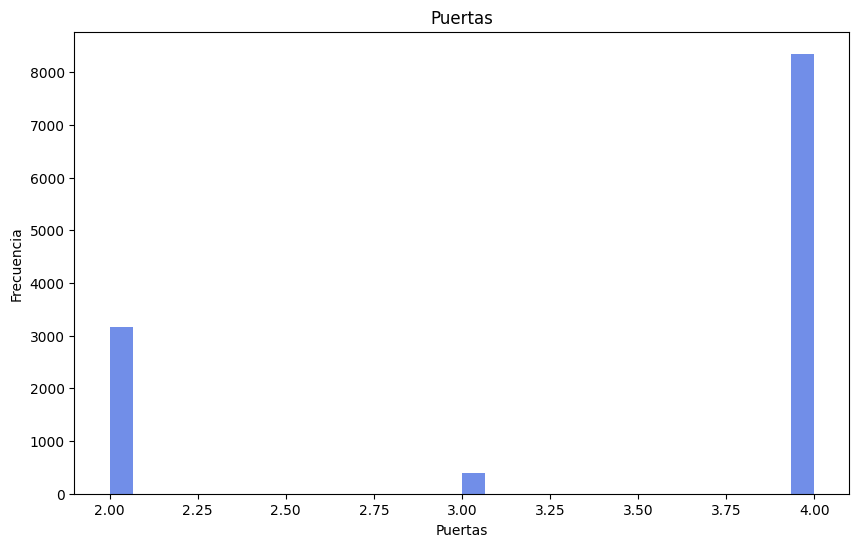

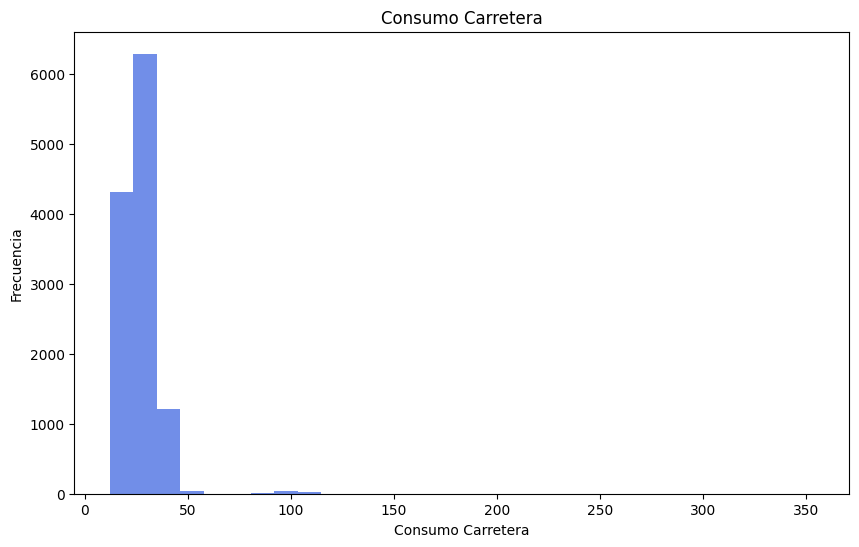

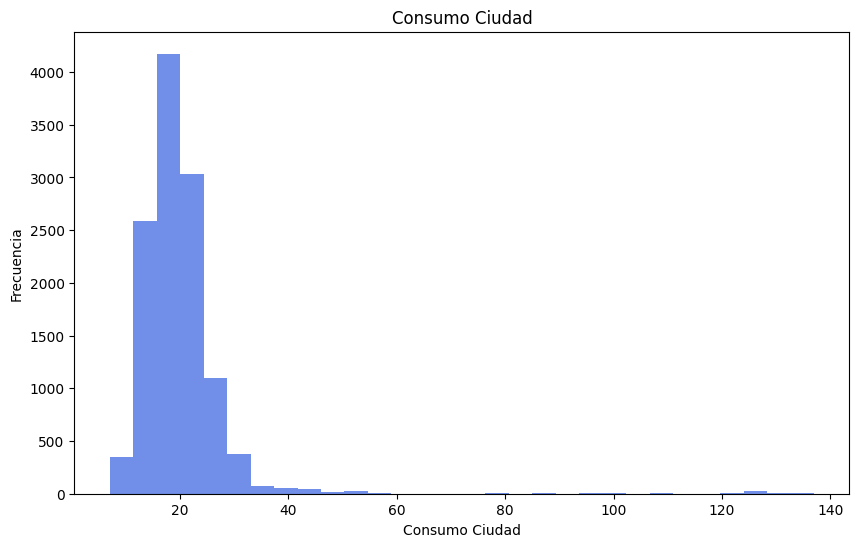

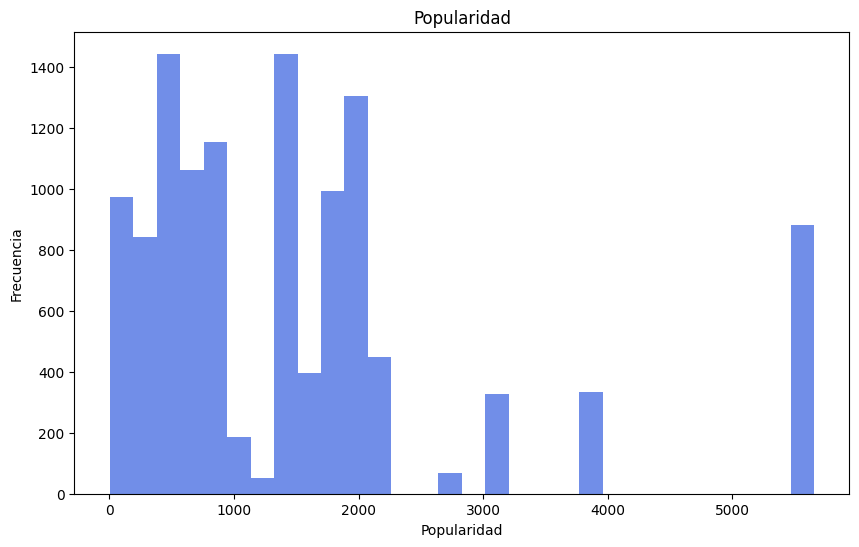

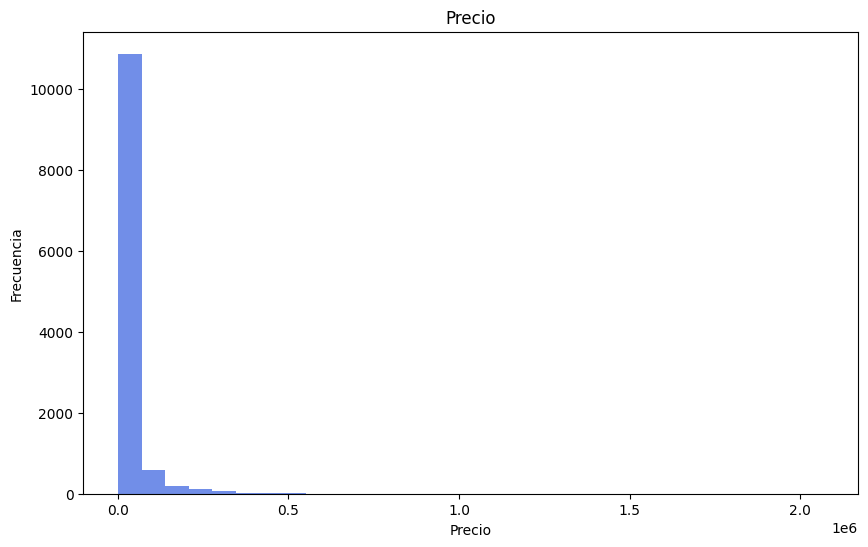

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numeric_types.index:
    column = numeric_types['Nombre'][i]
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], color='royalblue', bins=30, element='bars', linewidth=0)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(column)
    plt.show()

### 3.3. Bivariate Analysis

Let's perform the analysis of each variable against the target variable, which in this case is TotalFacturado.

#### 3.3.1. Qualitative Variables vs Target Variable


To understand the behavior of the qualitative variables against the target variable, we will use a BarPlot.

C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\692972893.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\692972893.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\692972893.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\692972893.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after se

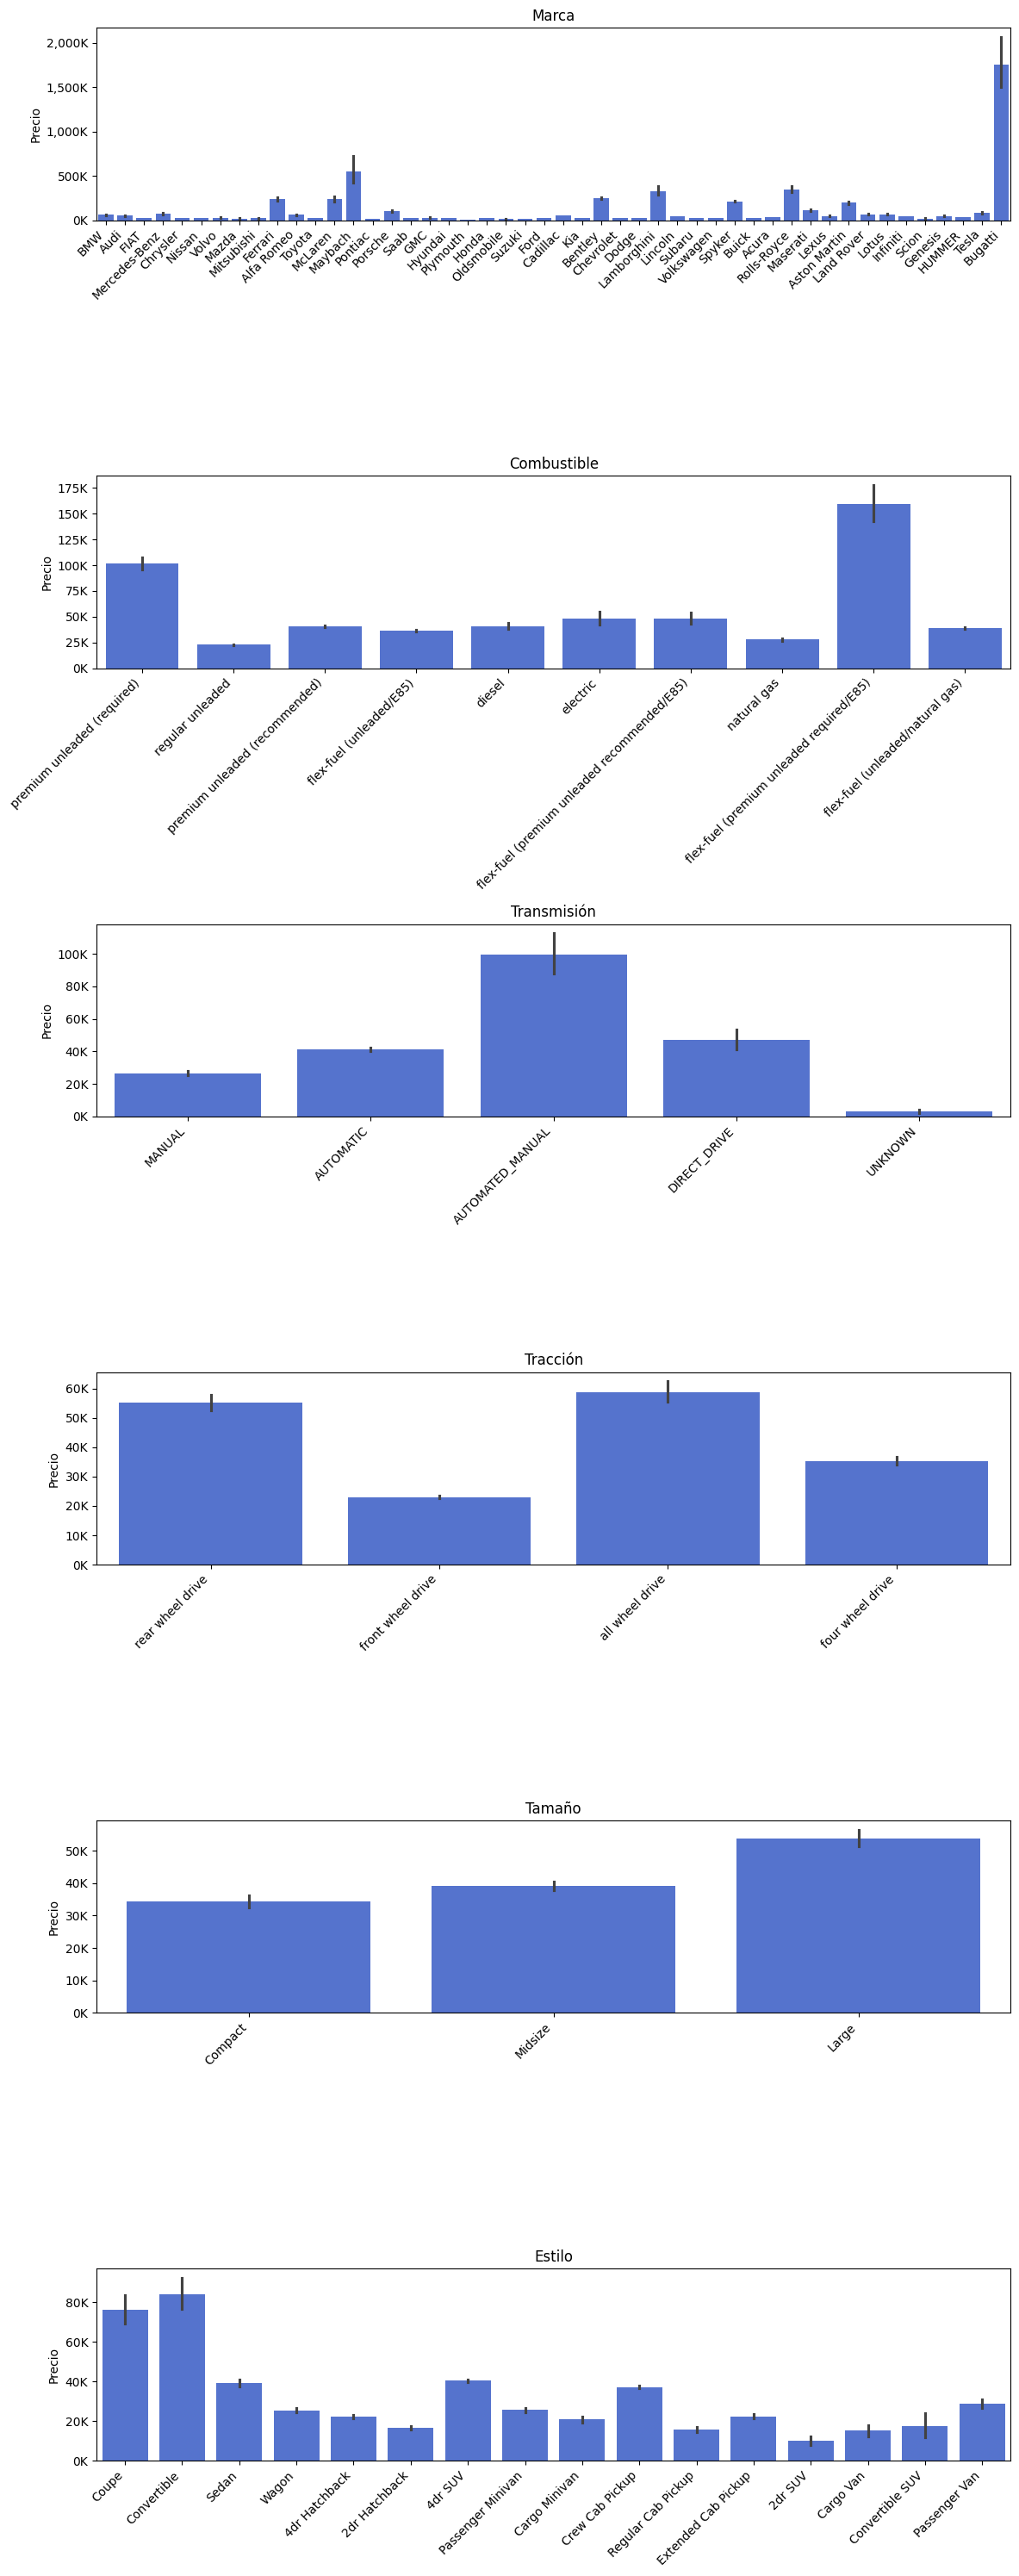

In [16]:
variables_interes = ['Marca', 'Combustible', 'Transmisión', 'Tracción', 'Tamaño', 'Estilo']
filtered_categoric_types = categoric_types[categoric_types['Nombre'].isin(variables_interes)]

num_plots = len(filtered_categoric_types.index)
num_cols = 1  
num_rows = (num_plots + num_cols - 1) // num_cols 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_plots:
        column = filtered_categoric_types['Nombre'].iloc[i]
        sns.barplot(data=df, x=column, y='Precio', color='royalblue', ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        ax.set_title(column)
        ax.set_xlabel('')
        ax.set_ylabel('Precio')
        
        #Formatear el eje y
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}K'))
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### 3.3.2. Quantitative Variables vs Target Variable

To understand the behavior of the quantitative variables against the target variable, we will use a ScatterPlot.

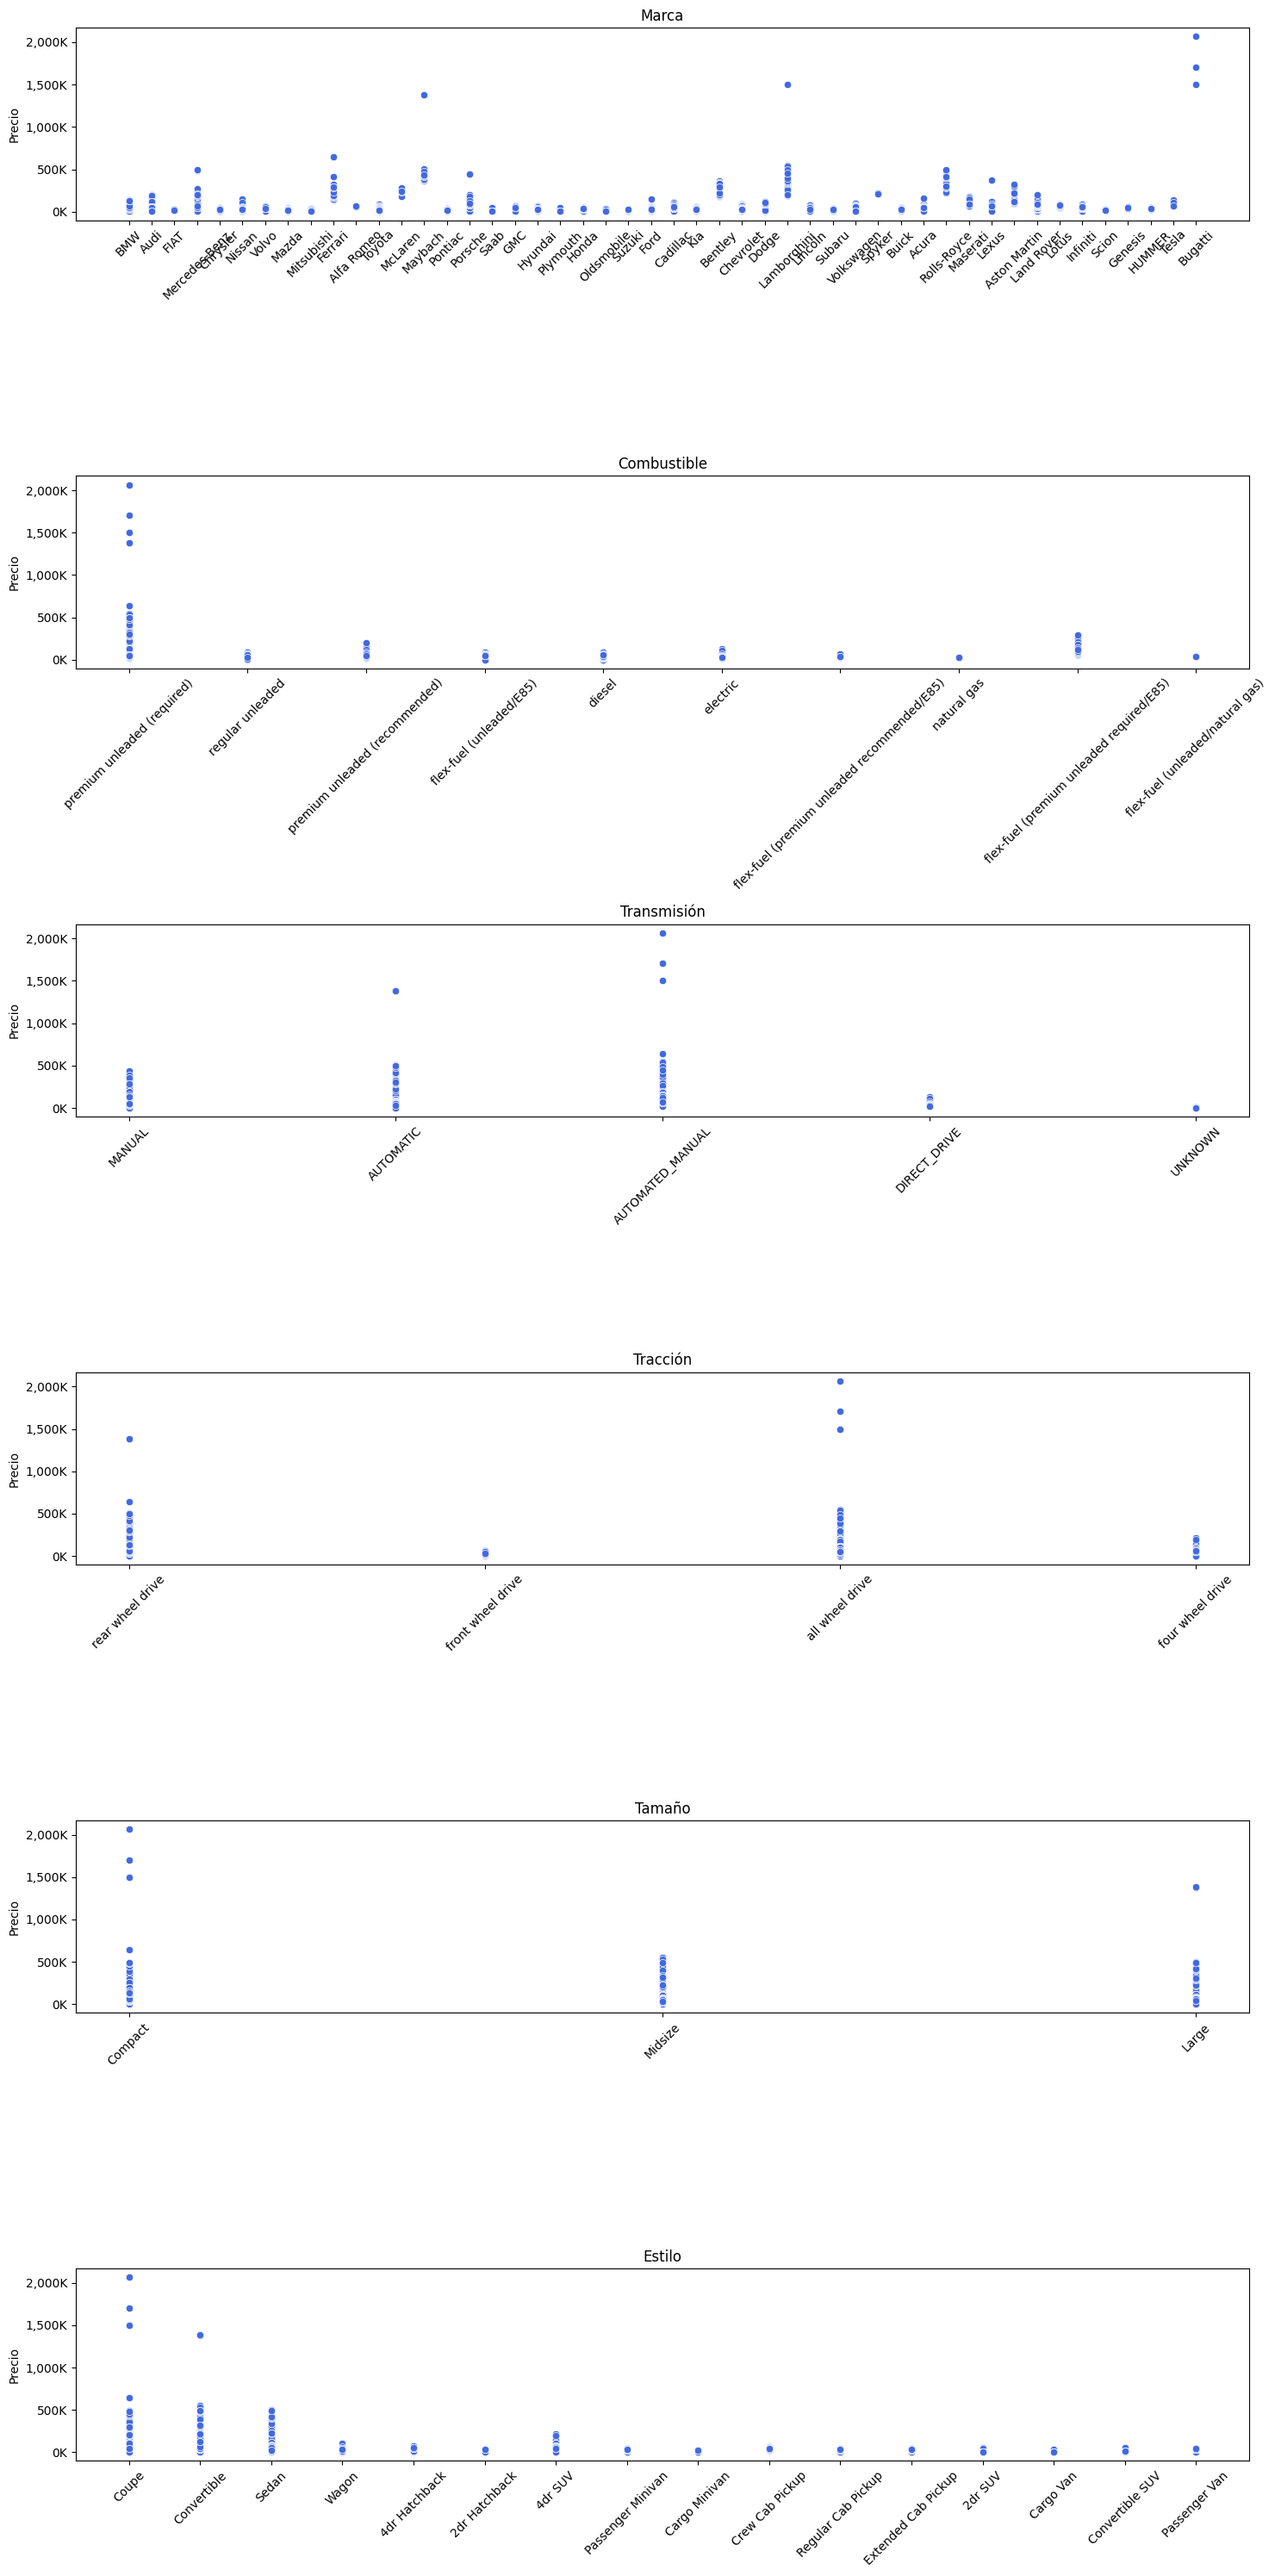

In [17]:
fig, axs = plt.subplots(figsize=(15, 30), nrows=len(variables_interes))

for ax, variable in zip(axs, variables_interes):
    sns.scatterplot(data=df, x=variable, y='Precio', ax=ax, color='royalblue')
    ax.set_title(variable)
    ax.set_ylabel('Precio')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}K'))

plt.tight_layout()
plt.show()

### 3.4. Multivariate Analysis

After the analysis against the target variable, we will calculate the correlation matrix to see the dependencies between quantitative variables.

In [18]:
numeric_variables_df = df.select_dtypes(include=['number'])

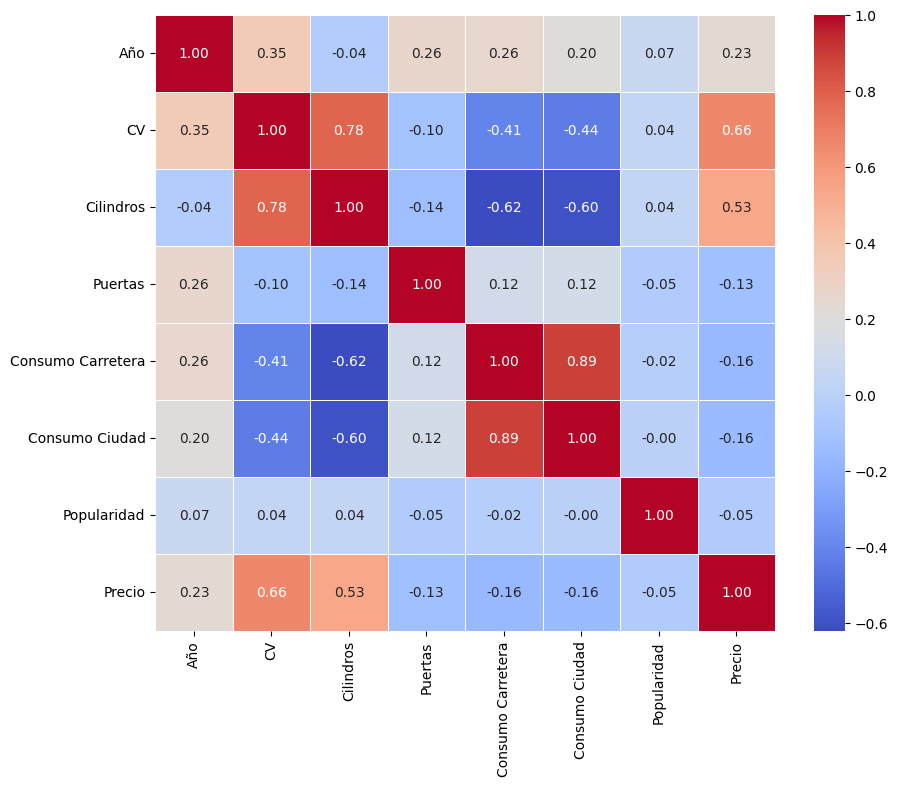

In [19]:
correlation_matrix = numeric_variables_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.show()

### 3.5. Data Quality

#### 3.5.1 Detecting Missing Values

In [20]:
print("Número de filas válidas por columna:")
print(df.count().to_string())
print()

Número de filas válidas por columna:
Marca                11914
Modelo               11914
Año                  11914
Combustible          11911
CV                   11845
Cilindros            11884
Transmisión          11914
Tracción             11914
Puertas              11908
Mercado               8172
Tamaño               11914
Estilo               11914
Consumo Carretera    11914
Consumo Ciudad       11914
Popularidad          11914
Precio               11914



#### 3.5.2 Detecting Outliers

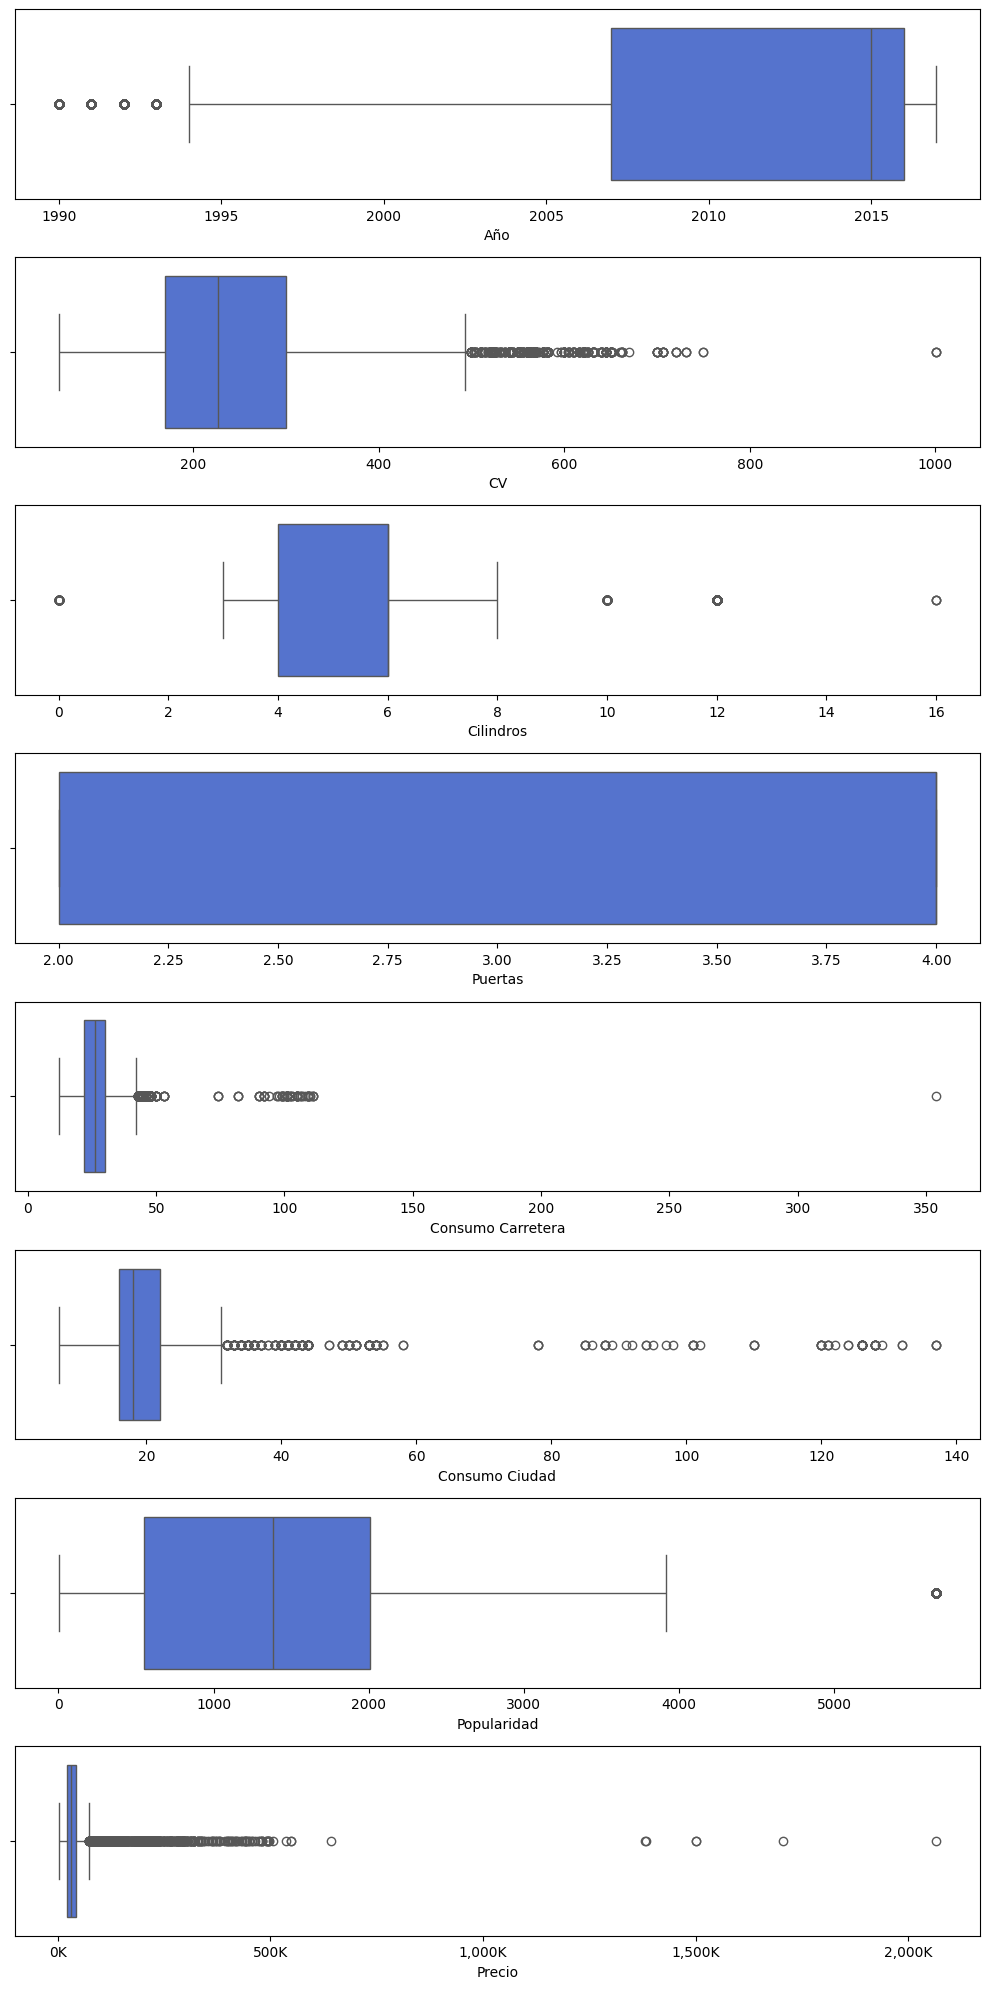

In [21]:
fig, axs = plt.subplots(figsize=(10, 20), nrows=8)

sns.boxplot(x=df['Año'], ax=axs[0], color='royalblue')
sns.boxplot(x=df['CV'], ax=axs[1], color='royalblue')
sns.boxplot(x=df['Cilindros'], ax=axs[2], color='royalblue')
sns.boxplot(x=df['Puertas'], ax=axs[3], color='royalblue')
sns.boxplot(x=df['Consumo Carretera'], ax=axs[4], color='royalblue')
sns.boxplot(x=df['Consumo Ciudad'], ax=axs[5], color='royalblue')
sns.boxplot(x=df['Popularidad'], ax=axs[6], color='royalblue')

sns.boxplot(x=df['Precio'], ax=axs[7], color='royalblue')

axs[7].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}K'))

plt.tight_layout()

plt.show()

## 4. Data Preparation

### 4.1 Variables

#### 4.1.1 Fuel Variable

In [22]:
df['Combustible'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [23]:
reemplazos_combustible = {
    'premium unleaded (required)': 'Premium sin plomo',
    'premium unleaded (recommended)': 'Premium sin plomo',
    'regular unleaded': 'Regular sin plomo',
    'flex-fuel (unleaded/E85)': 'Flexible',
    'flex-fuel (premium unleaded recommended/E85)': 'Flexible',
    'flex-fuel (premium unleaded required/E85)': 'Flexible',
    'flex-fuel (unleaded/natural gas)': 'Flexible',
    'diesel': 'Diésel',
    'electric': 'Eléctrico',
    'natural gas': 'gas natural'
}

df['Combustible'] = df['Combustible'].replace(reemplazos_combustible)

combustibles_unicos_simplificados = df['Combustible'].unique()
print(combustibles_unicos_simplificados)

['Premium sin plomo' 'Regular sin plomo' 'Flexible' 'Diésel' 'Eléctrico'
 'gas natural' nan]


In [24]:
df = df.dropna(subset=['Combustible'])
df['Combustible'].unique()

array(['Premium sin plomo', 'Regular sin plomo', 'Flexible', 'Diésel',
       'Eléctrico', 'gas natural'], dtype=object)

#### 4.1.2 Transmission Variable

In [25]:
df['Transmisión'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [26]:
transmission_mapping = {
    'MANUAL': 'Manual',
    'AUTOMATIC': 'Automatica',
    'AUTOMATED_MANUAL': 'Automática',  
    'DIRECT_DRIVE': 'Automatica',       
    'UNKNOWN': 'Unknown'
}

df['Transmisión'] = df['Transmisión'].map(transmission_mapping)


print("\nCategorías únicas después de simplificar:")
print(df['Transmisión'].unique())


Categorías únicas después de simplificar:
['Manual' 'Automatica' 'Automática' 'Unknown']


In [27]:
count_transmision_unknown = df['Transmisión'].eq('Unknown').sum()
count_transmision_unknown

19

In [28]:
df = df[df['Transmisión'] != 'Unknown']
df['Transmisión'].unique()

array(['Manual', 'Automatica', 'Automática'], dtype=object)

#### 4.1.3 CV, Cylinders, Doors, Highway Consumption, City Consumption, Price Variables

I consider that these variables cannot be floats; instead, they should be integers (int64). Additionally, the last three variables have a decimal point followed by zero, which indicates that they should also be handled as integers (int64).

In [29]:
df['CV'] = pd.to_numeric(df['CV'], errors='coerce').astype('Int64')
df['Cilindros'] = pd.to_numeric(df['Cilindros'], errors='coerce').astype('Int64')
df['Puertas'] = pd.to_numeric(df['Puertas'], errors='coerce').astype('Int64')
df['Consumo Carretera'] = pd.to_numeric(df['Consumo Carretera'], errors='coerce').astype('Int64')
df['Consumo Ciudad'] = pd.to_numeric(df['Consumo Ciudad'], errors='coerce').astype('Int64')
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce').astype('Int64')


print("\nTipos de datos después de la conversión:")
print(df.dtypes[['CV', 'Cilindros', 'Puertas', 'Consumo Carretera', 'Consumo Ciudad', 'Precio']])


Tipos de datos después de la conversión:
CV                   Int64
Cilindros            Int64
Puertas              Int64
Consumo Carretera    Int64
Consumo Ciudad       Int64
Precio               Int64
dtype: object


#### 4.1.4 Drive Variable

In [30]:
df['Tracción'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [31]:
df['Tracción'] = df['Tracción'].replace({
    'rear wheel drive': 'Trasera',
    'front wheel drive': 'Delantera',
    'all wheel drive': '4x4',
    'four wheel drive': '4x4'
})

df['Tracción'].unique()

array(['Trasera', 'Delantera', '4x4'], dtype=object)

#### 4.1.5 Style Variable

In [32]:
df['Estilo'].unique()


array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [33]:
mapa_estilos = {
    'Coupe': 'Coupé/Convertible',
    'Convertible': 'Coupé/Convertible',
    'Convertible SUV': 'SUV',
    'Sedan': 'Sedán',
    '4dr Hatchback': 'Turismo',
    '2dr Hatchback': 'Turismo',
    '4dr SUV': 'SUV',
    '2dr SUV': 'SUV',
    'Passenger Minivan': 'Van',
    'Cargo Minivan': 'Van',
    'Passenger Van': 'Van',
    'Crew Cab Pickup': 'Pickup',
    'Regular Cab Pickup': 'Pickup',
    'Extended Cab Pickup': 'Pickup',
    'Cargo Van': 'Van',
    'Wagon': 'Familiar'
}

# Aplicar el mapeo al DataFrame
df['Estilo'] = df['Estilo'].replace(mapa_estilos)

# Verificar las nuevas categorías únicas
nuevas_categorias_estilo = df['Estilo'].unique()
print("\nNuevas categorías únicas en la columna 'Estilo':")
print(nuevas_categorias_estilo)


Nuevas categorías únicas en la columna 'Estilo':
['Coupé/Convertible' 'Sedán' 'Familiar' 'Turismo' 'SUV' 'Van' 'Pickup']


#### 4.1.6 Size Variable

In [34]:
df['Tamaño'].unique()


array(['Compact', 'Midsize', 'Large'], dtype=object)

In [35]:
mapa_tamaños = {
    'Compact':'Compacto',
    'Midsize':'Mediano',
    'Large':'Grande',
}

# Aplicar el mapeo al DataFrame
df['Tamaño'] = df['Tamaño'].replace(mapa_tamaños)

# Verificar las nuevas categorías únicas
nuevas_categorias_tamaño= df['Tamaño'].unique()
print("\nNuevas categorías únicas en la columna 'Tamaño':")
print(nuevas_categorias_tamaño)


Nuevas categorías únicas en la columna 'Tamaño':
['Compacto' 'Mediano' 'Grande']


In [36]:
df['Combustible'].unique()

array(['Premium sin plomo', 'Regular sin plomo', 'Flexible', 'Diésel',
       'Eléctrico', 'gas natural'], dtype=object)

In [37]:
num_nan_combustible = df['Combustible'].isna().sum()
num_nan_combustible

0

In [38]:
reemplazos_combustible = {
    'premium unleaded (required)': 'Premium sin plomo',
    'premium unleaded (recommended)': 'Premium sin plomo',
    'regular unleaded': 'Regular sin plomo',
    'flex-fuel (unleaded/E85)': 'Flexible',
    'flex-fuel (premium unleaded recommended/E85)': 'Flexible',
    'flex-fuel (premium unleaded required/E85)': 'Flexible',
    'flex-fuel (unleaded/natural gas)': 'Flexible',
    'diesel': 'Diésel',
    'electric': 'Eléctrico',
    'natural gas': 'gas natural'
}

df['Combustible'] = df['Combustible'].replace(reemplazos_combustible)

combustibles_unicos_simplificados = df['Combustible'].unique()
print(combustibles_unicos_simplificados)

['Premium sin plomo' 'Regular sin plomo' 'Flexible' 'Diésel' 'Eléctrico'
 'gas natural']


### 4.2 Data Cleaning

#### 4.2.1 Removing Missing Values

To remove the null values, we will use the following code:

In [39]:
print("Eliminando datos nulos:")
print()
df = df.dropna()
print(df.count().to_string())

Eliminando datos nulos:

Marca                8081
Modelo               8081
Año                  8081
Combustible          8081
CV                   8081
Cilindros            8081
Transmisión          8081
Tracción             8081
Puertas              8081
Mercado              8081
Tamaño               8081
Estilo               8081
Consumo Carretera    8081
Consumo Ciudad       8081
Popularidad          8081
Precio               8081


#### 4.2.2 Removing Duplicate Records

Although there are no duplicate rows in this dataset, we should keep this in mind:

In [40]:
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print()
print("Eliminando filas con valores duplicados...")
df = df.drop_duplicates()
print()
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 8081
Número de columnas: 16

Eliminando filas con valores duplicados...

Número de filas: 7726
Número de columnas: 16


#### 4.2.3 Removing Outliers

In [41]:
df.columns

Index(['Marca', 'Modelo', 'Año', 'Combustible', 'CV', 'Cilindros',
       'Transmisión', 'Tracción', 'Puertas', 'Mercado', 'Tamaño', 'Estilo',
       'Consumo Carretera', 'Consumo Ciudad', 'Popularidad', 'Precio'],
      dtype='object')

Número de filas (con valores atípicos): 7726
Eliminando valores atípicos...
Número de filas (sin valores atípicos): 6175


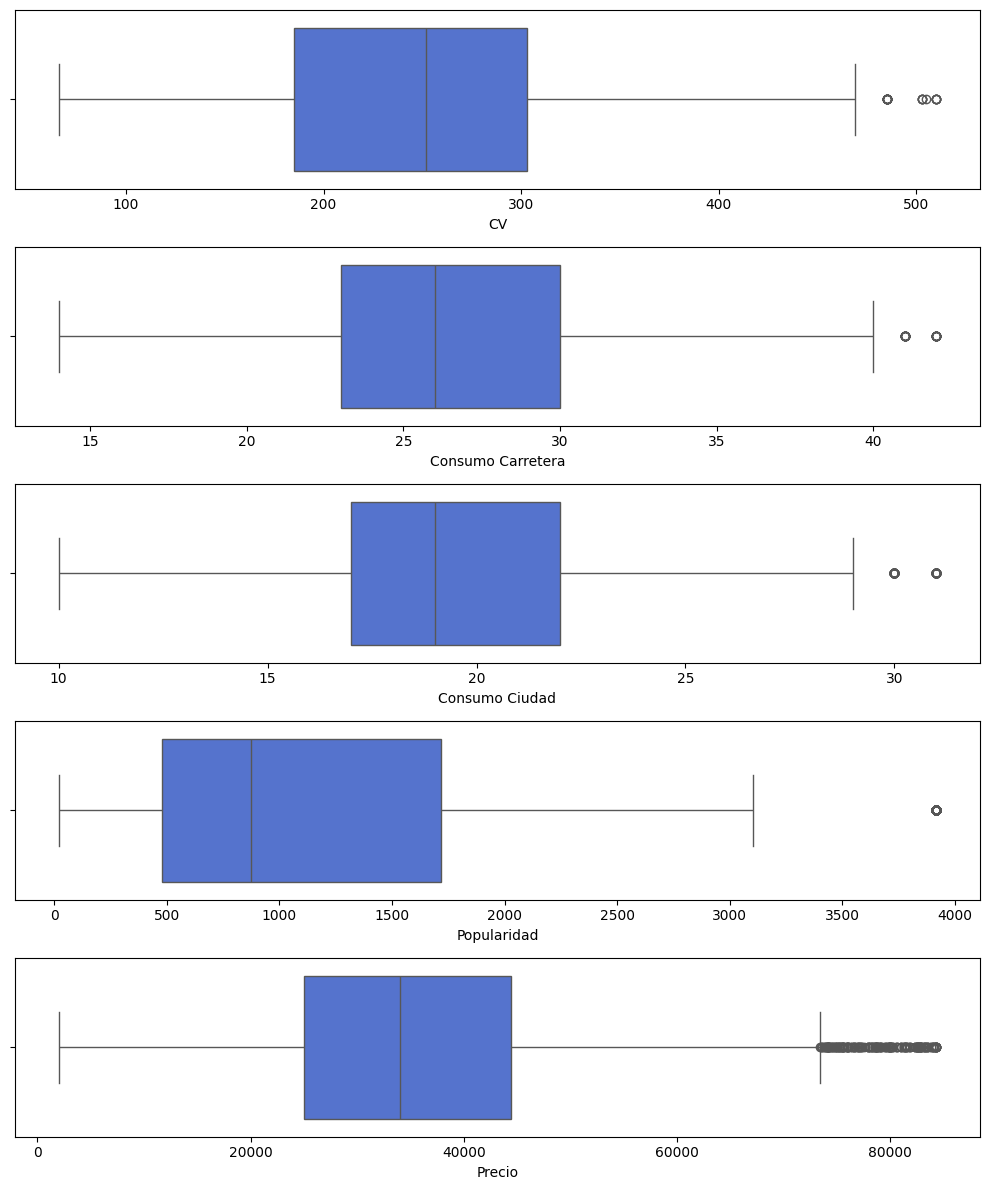

In [42]:
columns_with_outliers = ['CV', 'Consumo Carretera', 'Consumo Ciudad', 'Popularidad', 'Precio']

print(f"Número de filas (con valores atípicos): {df.shape[0]}")
print("Eliminando valores atípicos...")

Q1 = df[columns_with_outliers].quantile(0.25)
Q3 = df[columns_with_outliers].quantile(0.75)
IQR = Q3 - Q1  

df = df[~((df[columns_with_outliers] < (Q1 - 1.5 * IQR)) | (df[columns_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Número de filas (sin valores atípicos): {df.shape[0]}")

fig, axs = plt.subplots(figsize=(10, 12), nrows=5)
sns.boxplot(x=df['CV'], ax=axs[0], color='royalblue')
sns.boxplot(x=df['Consumo Carretera'], ax=axs[1], color='royalblue')
sns.boxplot(x=df['Consumo Ciudad'], ax=axs[2], color='royalblue')
sns.boxplot(x=df['Popularidad'], ax=axs[3], color='royalblue')
sns.boxplot(x=df['Precio'], ax=axs[4], color='royalblue')

plt.tight_layout()
plt.show()

### 4.3. Constructing 

In [43]:
scaler = MinMaxScaler()

# Normaliza las columnas
df[['Año']] = scaler.fit_transform(df[['Año']])
df[['CV']] = scaler.fit_transform(df[['CV']])
df[['Consumo Carretera']] = scaler.fit_transform(df[['Consumo Carretera']])
df[['Consumo Ciudad']] = scaler.fit_transform(df[['Consumo Ciudad']])
df[['Popularidad']] = scaler.fit_transform(df[['Popularidad']])
df[['Precio']] = scaler.fit_transform(df[['Precio']])

# Muestra los primeros 5 registros del DataFrame normalizado
print(df.head())

  Marca      Modelo       Año        Combustible        CV  Cilindros  \
0   BMW  1 Series M  0.777778  Premium sin plomo  0.605856          6   
1   BMW    1 Series  0.777778  Premium sin plomo  0.527027          6   
2   BMW    1 Series  0.777778  Premium sin plomo  0.527027          6   
3   BMW    1 Series  0.777778  Premium sin plomo  0.369369          6   
4   BMW    1 Series  0.777778  Premium sin plomo  0.369369          6   

  Transmisión Tracción  Puertas                                Mercado  \
0      Manual  Trasera        2  Factory Tuner,Luxury,High-Performance   
1      Manual  Trasera        2                     Luxury,Performance   
2      Manual  Trasera        2                Luxury,High-Performance   
3      Manual  Trasera        2                     Luxury,Performance   
4      Manual  Trasera        2                                 Luxury   

     Tamaño             Estilo  Consumo Carretera  Consumo Ciudad  \
0  Compacto  Coupé/Convertible           0.4285

### 4.4. Formatting

In [44]:
df.shape

(6175, 16)

In [45]:
df.columns

Index(['Marca', 'Modelo', 'Año', 'Combustible', 'CV', 'Cilindros',
       'Transmisión', 'Tracción', 'Puertas', 'Mercado', 'Tamaño', 'Estilo',
       'Consumo Carretera', 'Consumo Ciudad', 'Popularidad', 'Precio'],
      dtype='object')

In [46]:
df = df.drop(columns=['Modelo', 'Mercado'])
df.shape

(6175, 14)

In [47]:
categorical_columns = df.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
df_ohe = df.copy()

#Iterar sobre las columnas categóricas y aplicar OHE
for column in categorical_columns:
    transformed = ohe.fit_transform(df_ohe[[column]])
    ohe_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out([column]), index=df_ohe.index)
    df_ohe = pd.concat([df_ohe, ohe_df], axis=1)
    df_ohe.drop(column, axis=1, inplace=True)

df_ohe

c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocess

,Año,CV,Cilindros,Puertas,Consumo Carretera,Consumo Ciudad,Popularidad,Precio,Marca_Alfa Romeo,Marca_Audi,...,Tracción_Delantera,Tracción_Trasera,Tamaño_Grande,Tamaño_Mediano,Estilo_Familiar,Estilo_Pickup,Estilo_SUV,Estilo_Sedán,Estilo_Turismo,Estilo_Van
0,0.777778,0.605856,6,2,0.428571,0.428571,1.000000,0.536107,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.777778,0.527027,6,2,0.500000,0.428571,1.000000,0.469481,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.777778,0.527027,6,2,0.500000,0.476190,1.000000,0.417249,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.777778,0.369369,6,2,0.500000,0.380952,1.000000,0.333435,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.369369,6,2,0.500000,0.380952,1.000000,0.394777,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0.814815,0.527027,6,4,0.321429,0.285714,0.046983,0.535925,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11910,0.814815,0.527027,6,4,0.321429,0.285714,0.046983,0.664075,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11911,0.814815,0.527027,6,4,0.321429,0.285714,0.046983,0.590586,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11912,0.851852,0.527027,6,4,0.321429,0.285714,0.046983,0.594230,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df_ohe.isna().sum()

Año                              0
CV                               0
Cilindros                        0
Puertas                          0
Consumo Carretera                0
Consumo Ciudad                   0
Popularidad                      0
Precio                           0
Marca_Alfa Romeo                 0
Marca_Audi                       0
Marca_BMW                        0
Marca_Buick                      0
Marca_Cadillac                   0
Marca_Chevrolet                  0
Marca_Chrysler                   0
Marca_Dodge                      0
Marca_FIAT                       0
Marca_GMC                        0
Marca_Genesis                    0
Marca_HUMMER                     0
Marca_Honda                      0
Marca_Hyundai                    0
Marca_Infiniti                   0
Marca_Kia                        0
Marca_Land Rover                 0
Marca_Lexus                      0
Marca_Lincoln                    0
Marca_Lotus                      0
Marca_Maserati      

In [49]:
df_ohe.shape

(6175, 59)

In [50]:
df_ohe

,Año,CV,Cilindros,Puertas,Consumo Carretera,Consumo Ciudad,Popularidad,Precio,Marca_Alfa Romeo,Marca_Audi,...,Tracción_Delantera,Tracción_Trasera,Tamaño_Grande,Tamaño_Mediano,Estilo_Familiar,Estilo_Pickup,Estilo_SUV,Estilo_Sedán,Estilo_Turismo,Estilo_Van
0,0.777778,0.605856,6,2,0.428571,0.428571,1.000000,0.536107,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.777778,0.527027,6,2,0.500000,0.428571,1.000000,0.469481,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.777778,0.527027,6,2,0.500000,0.476190,1.000000,0.417249,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.777778,0.369369,6,2,0.500000,0.380952,1.000000,0.333435,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.369369,6,2,0.500000,0.380952,1.000000,0.394777,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0.814815,0.527027,6,4,0.321429,0.285714,0.046983,0.535925,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11910,0.814815,0.527027,6,4,0.321429,0.285714,0.046983,0.664075,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11911,0.814815,0.527027,6,4,0.321429,0.285714,0.046983,0.590586,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11912,0.851852,0.527027,6,4,0.321429,0.285714,0.046983,0.594230,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5. Model Development and Evaluation

Como queremos estimar una variable cuantitativa, es un problema de regresión y siguiendo la guía de scikit-learn: 
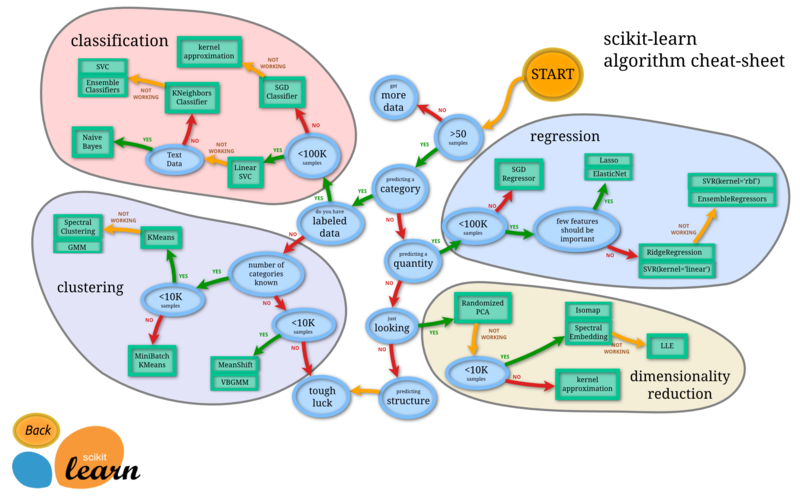



### 5.1 Simple Linear Regression

Error cuadrático medio (MSE): 0.0210
Coeficiente de determinación (R2): 0.5144


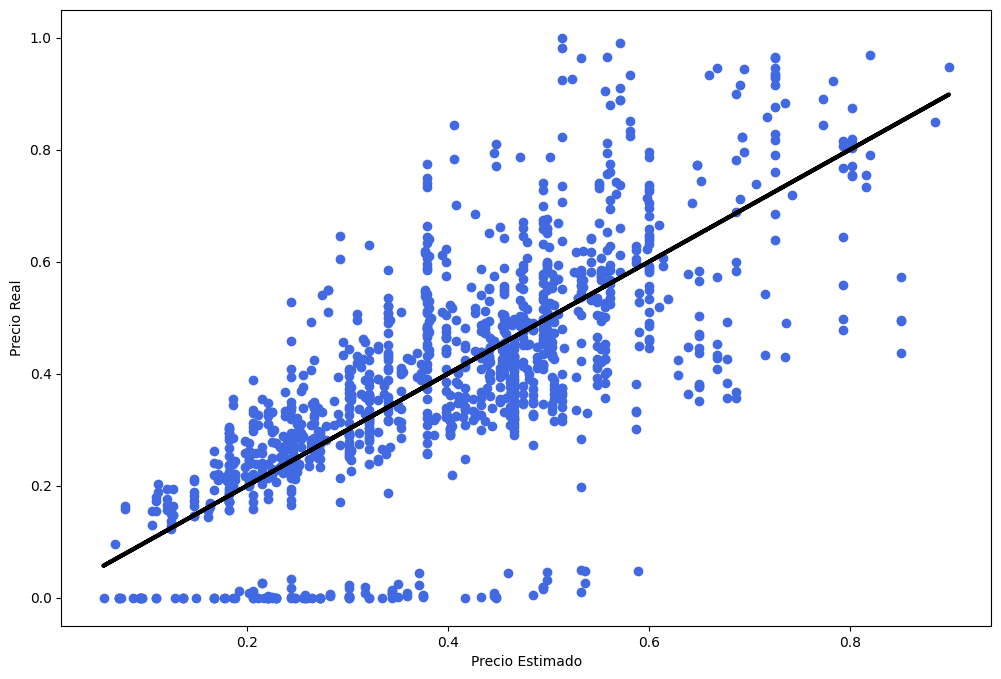

In [51]:
x_cols = ['CV']
y_cols = ['Precio']

scaler = MinMaxScaler()
X = scaler.fit_transform(df_ohe[x_cols])
y = scaler.fit_transform(df_ohe[y_cols])

# Generamos el dataset de entrenamiento y el de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

# Entrenamos el modelo
lg = linear_model.LinearRegression()
lg.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = lg.predict(X_test)

print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred):.4f}")

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred, y_test,  color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=3)

plt.xlabel('Precio Estimado')
plt.ylabel('Precio Real')
plt.show()

After fitting my linear regression model, I obtained an MSE of 0.0210, indicating a low average error and good prediction accuracy. The R² of 0.5144 shows that the model explains 51.44% of the variability in prices, capturing a significant portion of the variation, although there is still room for improvement.

### 5.2 Multiple Linear Regression

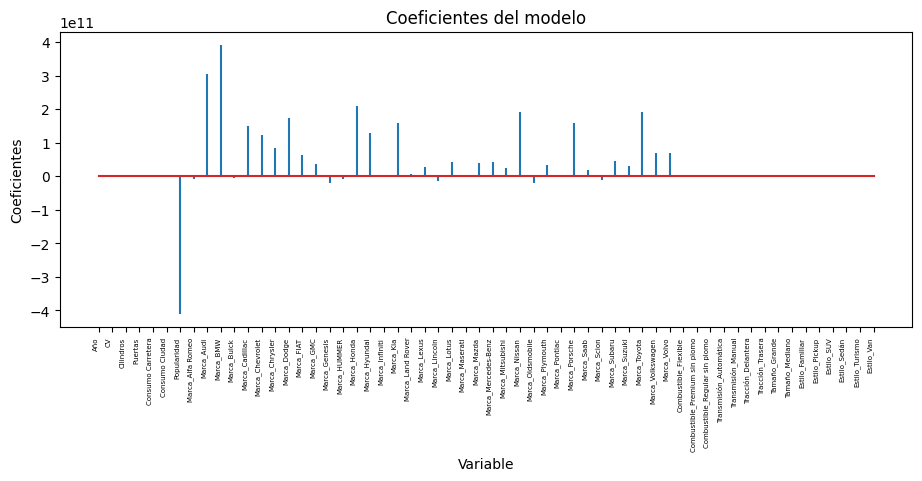

In [52]:
# Seleccionamos las variables explicativas y la variable objetivo
X = df_ohe.drop(columns='Precio')
y = df_ohe['Precio']

# Normalizamos las variables para interpretar mejor el resultado
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Dividimos el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7,
    random_state=1234,
    shuffle=True
)

# Creamos y entrenamos el modelo
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
    {'predictor': X_train.columns,
     'coef': modelo.coef_}
)

# Graficamos los coeficientes
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo')
plt.show()



Error cuadrático medio (MSE): 0.0079
Raíz del Error cuadrático medio (MSE): 0.0890
Coeficiente de determinación (R2): 0.8190


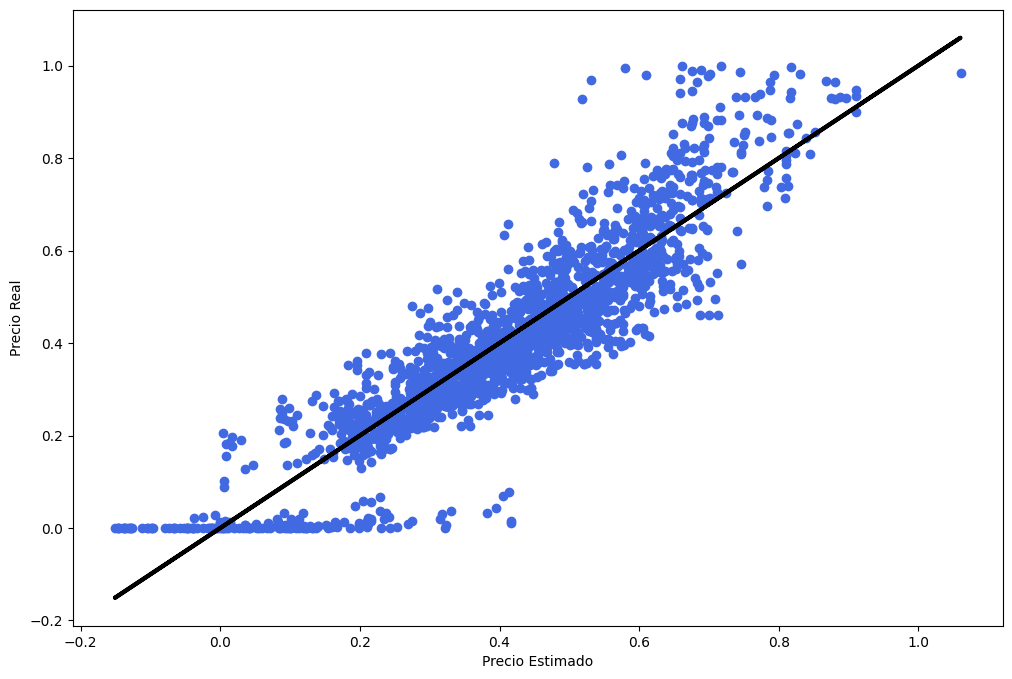

In [53]:
# Evaluamos el modelo
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
y_pred[:10]

print("")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Raíz del Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred,squared=False):.4f}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred):.4f}")

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred, y_test,  color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=3)

plt.xlabel('Precio Estimado')
plt.ylabel('Precio Real')
plt.show()

The second improved model shows a remarkable enhancement in its predictive capacity compared to the first. The Mean Squared Error (MSE) decreased from 0.0210 to 0.0079, representing a significant reduction in prediction errors. Additionally, the coefficient of determination (R²) increased from 0.5144 to 0.8190, coming closer to 1, indicating that the improved model explains a larger proportion of the variability in the data. These improvements suggest that the new model is much more accurate and effective in capturing the relationship between the independent and dependent variables.

### 5.3 Ridge Regularization

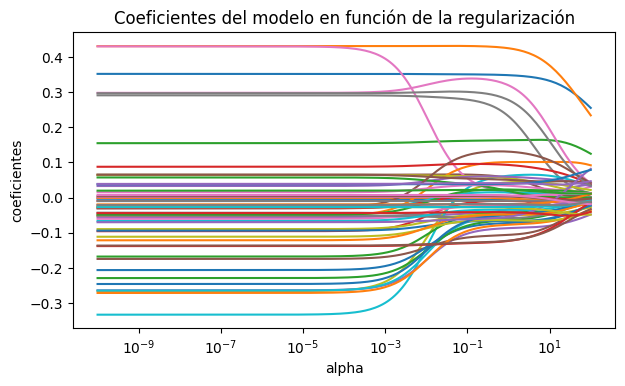

In [54]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto RidgeCV utiliza el mean squared error
modelo = linear_model.RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

# Evolución de los coeficientes en función de alpha
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [55]:
alpha_optimo = modelo.alpha_
print(f"El valor óptimo de alpha es: {alpha_optimo}")

El valor óptimo de alpha es: 0.22219468609395193


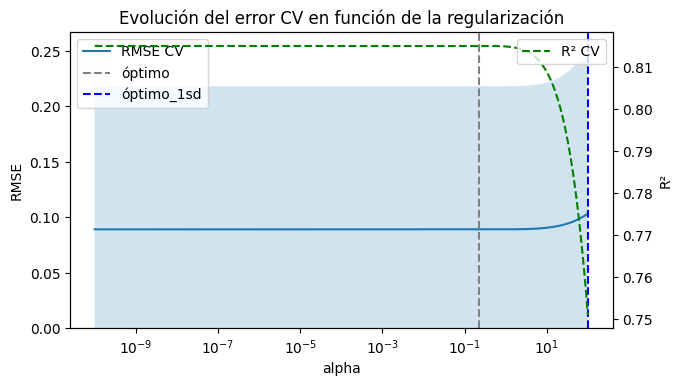

In [56]:
# modelo.cv_values_ almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Cálculo del R² basado en la varianza de los valores de CV
# Varianza de los valores de validación cruzada
r2_cv = 1 - (mse_cv / np.var(y_train))  # r2_cv en función de MSE

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))

ax.plot(modelo.alphas, rmse_cv, label="RMSE CV")
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

# Gráfico de R²
ax2 = ax.twinx()  # Crear un segundo eje Y
ax2.plot(modelo.alphas, r2_cv, color='green', label="R² CV", linestyle='--')
ax2.set_ylabel('R²')

# Líneas verticales para óptimos
ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0, None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
ax.legend(loc='upper left')

# Leyenda para R²
ax2.legend(loc='upper right')

plt.show()

In [57]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.22219468609395193


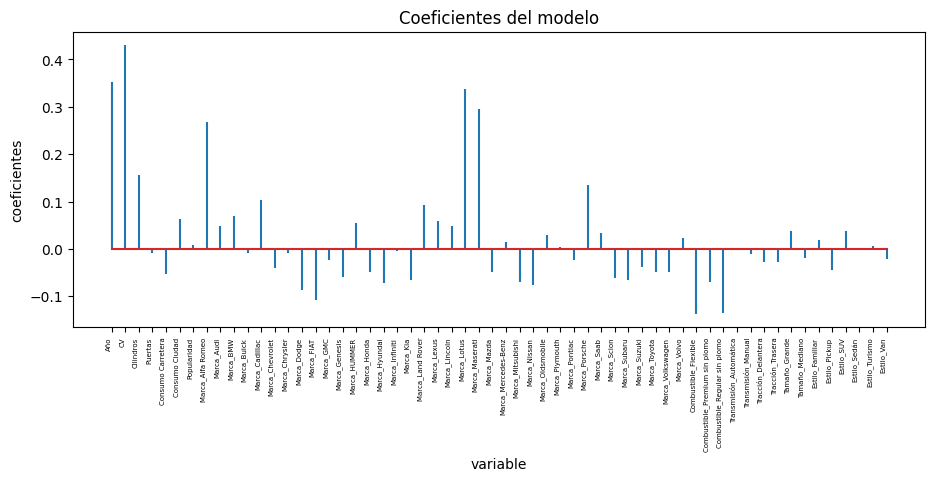

In [58]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [59]:
# Predicciones en el conjunto de test
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
print(y_pred[:10])

# Evaluación del modelo
print("")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Raíz del Error cuadrático medio (RMSE): {mean_squared_error(y_test, y_pred, squared=False):.4f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred):.4f}")

ax.set_title('Coeficientes del modelo')
plt.tight_layout()
plt.show()

[0.52816677 0.15839259 0.08720856 0.60286498 0.07159573 0.36509007
 0.29134444 0.35504044 0.01413114 0.69619026]

Error cuadrático medio (MSE): 0.0079
Raíz del Error cuadrático medio (RMSE): 0.0890
Coeficiente de determinación (R²): 0.8192


<Figure size 640x480 with 0 Axes>

### 5.4 Lasso Regularization

c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+00, tolerance: 8.774e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.952e+00, tolerance: 8.774e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

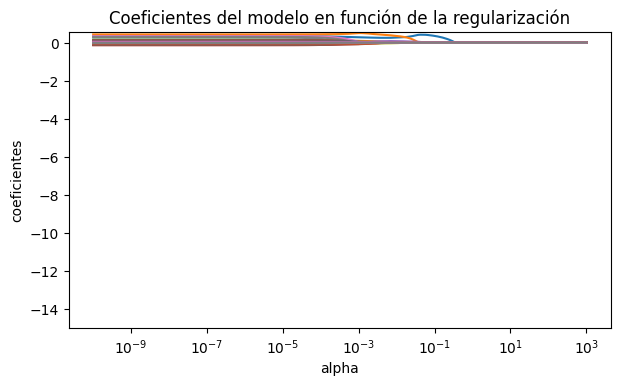

In [60]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto LassoCV utiliza el mean squared error
modelo = linear_model.LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

# Evolución de los coeficientes en función de alpha
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+00, tolerance: 8.774e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.952e+00, tolerance: 8.774e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\cuatr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

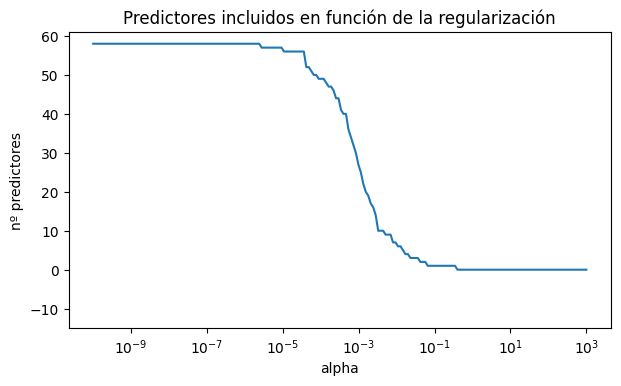

In [61]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

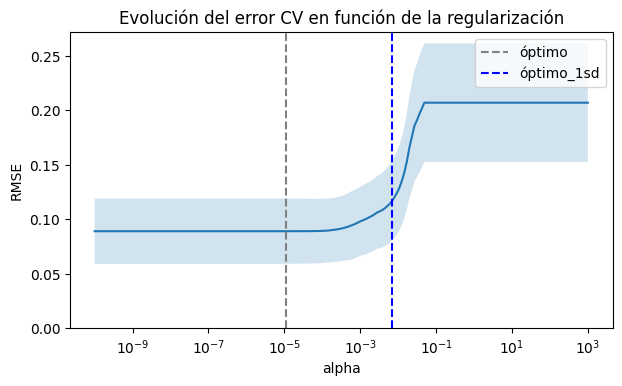

In [62]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [63]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1.0718913192051286e-05


In [64]:
# Mejor valor alpha encontrado + 1sd
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.00690551]


In [65]:
# Mejor modelo alpha óptimo + 1sd
modelo = linear_model.Lasso(alpha=float(optimo_1sd))
modelo.fit(X_train, y_train)


C:\Users\cuatr\AppData\Local\Temp\ipykernel_19492\1266017097.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelo = linear_model.Lasso(alpha=float(optimo_1sd))


Lasso(alpha=0.006905513520162345)

In [66]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,Año,0.222024
1,CV,0.348216
11,Marca_Cadillac,0.016308
44,Combustible_Premium sin plomo,0.067789
45,Combustible_Regular sin plomo,-0.027955
47,Transmisión_Manual,-0.023898
48,Tracción_Delantera,-0.040744
50,Tamaño_Grande,0.025866
54,Estilo_SUV,0.023295


The result is as expected: Year and HP have positive coefficients and high correlation.

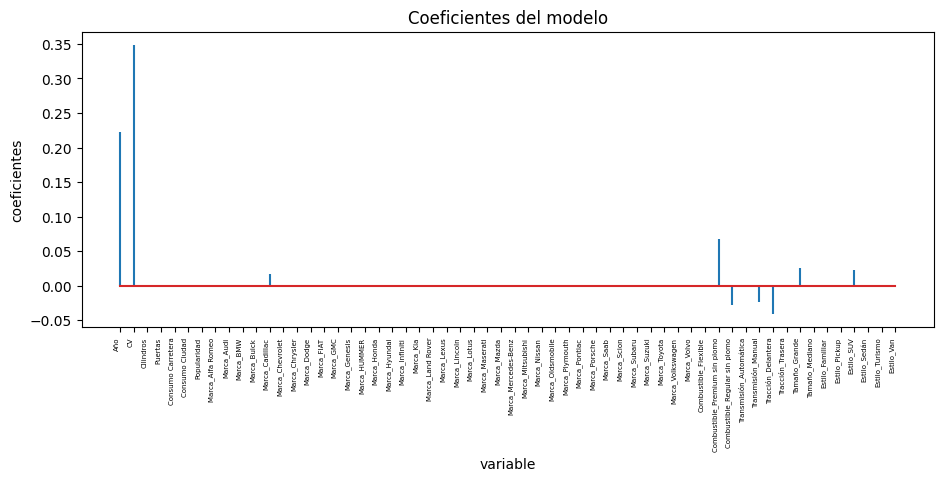

In [67]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [71]:
# Predicciones test
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
y_pred[:10]

# Error de test del modelo 
rmse_lasso = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print("")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Raíz del Error cuadrático medio (RMSE): {rmse_lasso:.4f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred):.4f}")



Error cuadrático medio (MSE): 0.0140
Raíz del Error cuadrático medio (RMSE): 0.1185
Coeficiente de determinación (R²): 0.6793


Spot-on results. Still, we haven't managed to improve the MSE.